## Setup

In [1]:
%load_ext autoreload
%load_ext line_profiler
%autoreload 2

import numpy as np
from mpl_toolkits import mplot3d
import matplotlib
import matplotlib.pyplot as plt
import scipy.optimize as optimize

import Bargaining as brg
import bargaining_algorithm as ba
from figures import *
from checks import *

import numpy as np
import numba as nb
import scipy.optimize as optimize
import copy

from EconModel import EconModelClass
from consav.grids import nonlinspace
from consav import linear_interp, linear_interp_1d
from consav import quadrature

#plt.rcParams.update({'figure.max_open_warning': 0,'text.usetex': False})

# c++ settings
do_cpp = True
do_compile = True
threads = 16

# Load and save settings
load_model1 = False
load_model2 = False
save_model1 = True
save_model2 = True

Compile C++ files

In [2]:
# compile c++ files
if do_cpp & do_compile:
    model = brg.HouseholdModelClass(par={'do_cpp':do_cpp,'num_Ctot':100})
    model.link_to_cpp(force_compile=do_compile)

### Model 1

User settings

In [57]:
# Set name 
name        = 'model 4 cpp'
latexname   = ''

# Set parameters
par1        = {
              'T':3,
              'div_A_share':0.3,
              'sigma_love':0.0,
              
              'do_cpp': True,
              'threads':threads,
              'brg_algo':0,
              
              'cpp_intraperiod_consumption':True,
              'cpp_value_of_choice_couple':True,
              'cpp_solve_remain_couple': False
              }

Setup model1

In [58]:
# Setup model
if load_model1:
    model1 = brg.HouseholdModelClass(name=name, load=True)
    for key in par1.keys():
        par1[key] = getattr(model1.par,key)
else:
    model1 = brg.HouseholdModelClass(name=name, par=par1)
    
model1.link_to_cpp(force_compile=False)
model1.spec = {'latexname':latexname,'par':par1}

In [5]:
# model1.cpp.delink()
# model1.link_to_cpp(force_compile=do_compile)

Model 2

User settings

In [6]:
# Set name 
name        = 'model 4 cpp remain_solve'
latexname   = ''

# Set parameters
par_changes = {
              'cpp_solve_remain_couple':True,
              }

Setup model2

In [7]:
# Create par2
par2 = copy.deepcopy(par1)
for key in par_changes.keys():
    par2[key] = par_changes[key]
    
# Setup model
if load_model2:
    model2 = brg.HouseholdModelClass(name=name, load=True)
    for key in par2.keys():
        par2[key] = getattr(model2.par,key)
else:
    model2 = brg.HouseholdModelClass(name=name, par=par2)

model2.link_to_cpp(force_compile=False)
model2.spec = {'latexname':latexname,'par':par2}

### Summary

In [59]:
column1_length = 40
column2_length = 20
column3_length = 20

print(f"{' '*column1_length}|{model1.name.center(column2_length)}|{model2.name.center(column3_length)}|")
print("-"*(column1_length+column2_length+column3_length+3))
for key in [p for p in par1.keys() if p not in par_changes.keys()]:
    print(f"{key.ljust(column1_length)}|{str(par1[key]).center(column2_length)}|{str(par2[key]).center(column3_length)}|")
print("-"*(column1_length+column2_length+column3_length+3))
for key in par_changes.keys():
    print(f"{key.ljust(column1_length)}|{str(par1[key]).center(column2_length)}|{str(par2[key]).center(column3_length)}|")

                                        |    model 4 cpp     |model 4 cpp remain_solve|
-----------------------------------------------------------------------------------
T                                       |         3          |         3          |
div_A_share                             |        0.3         |        0.3         |
sigma_love                              |        0.0         |        0.0         |
do_cpp                                  |        True        |       False        |
threads                                 |         16         |         16         |
brg_algo                                |         0          |         0          |
cpp_intraperiod_consumption             |        True        |        True        |
cpp_value_of_choice_couple              |        True        |        True        |
-----------------------------------------------------------------------------------
cpp_solve_remain_couple                 |       False        |        Tr

In [11]:
model2.par.cpp_value_of_choice_couple

True

### Solve models

Solve model1

In [60]:
if load_model1==False:
    model1.solve()
if save_model1:
    model1.save()

Solve model2

In [14]:
if load_model2==False:
    model2.solve()
if save_model2:
    model2.save()

t= 2
t= 1
t= 0


## Calculate differences in the solutions

Absolute differences

In [61]:
sol_max_abs_diff = difference_in_namespace(model1.sol, model2.sol, output='max_abs_value', relative=False)
print_namespace(sol_max_abs_diff)

Vw_single: 4.901555605840713e-09
Vm_single: 2.7291451321076465e-09
Cw_priv_single: 3.488141908736253e-05
Cm_priv_single: 0.0002744503467229098
Cw_pub_single: 3.488141908736253e-05
Cm_pub_single: 0.0002744503467229098
Cw_tot_single: 6.976283817472506e-05
Cm_tot_single: 0.0005489006934458196
Vw_trans_single: 4.901555605840713e-09
Vm_trans_single: 2.7291451321076465e-09
Cw_priv_trans_single: 3.488141908736253e-05
Cm_priv_trans_single: 0.0002744503467229098
Cw_pub_trans_single: 3.488141908736253e-05
Cm_pub_trans_single: 0.0002744503467229098
Cw_tot_trans_single: 6.976283817472506e-05
Cm_tot_trans_single: 0.0005489006934458196
Vw_couple: 4.901555827885318e-09
Vm_couple: 2.729146242330671e-09
Cw_priv_couple: 3.488141908736253e-05
Cm_priv_couple: 0.0002744503467229098
C_pub_couple: 3.488141908736253e-05
C_tot_couple: 0.0002203864074066253
Vw_remain_couple: 1.622571366155512e-08
Vm_remain_couple: 1.4146273485948768e-08
Cw_priv_remain_couple: 6.081780017375138e-07
Cm_priv_remain_couple: 1.74971

Relative differences

In [62]:
sol_max_rel_diff = difference_in_namespace(model1.sol, model2.sol, output='max_abs_value', relative=True)
print_namespace(sol_max_rel_diff)

Vw_single: 2.9550907713205003e-09
Vm_single: 2.8958501132064974e-09
Cw_priv_single: 4.8982686083611553e-05
Cm_priv_single: 0.00021826256645580722
Cw_pub_single: 4.8982686083611553e-05
Cm_pub_single: 0.00021826256645580722
Cw_tot_single: 4.8982686083611553e-05
Cm_tot_single: 0.00021826256645580722
Vw_trans_single: 2.9550907713205003e-09
Vm_trans_single: 2.8958501132064974e-09
Cw_priv_trans_single: 4.8982686083611553e-05
Cm_priv_trans_single: 0.00021826256645580722
Cw_pub_trans_single: 4.8982686083611553e-05
Cm_pub_trans_single: 0.00021826256645580722
Cw_tot_trans_single: 4.8982686083611553e-05
Cm_tot_trans_single: 0.00021826256645580722
Vw_couple: 3.609253601944471e-08
Vm_couple: 3.141540259734922e-08
Cw_priv_couple: 4.8982686083611553e-05
Cm_priv_couple: 0.00021826256645580722
C_pub_couple: 4.8982686083611553e-05
C_tot_couple: 7.582055427940571e-05
Vw_remain_couple: 3.609253601944471e-08
Vm_remain_couple: 3.141540259734922e-08
Cw_priv_remain_couple: 3.544404272549438e-07
Cm_priv_remain

c:\Users\zbk883\OneDrive - University of Copenhagen\Documents\projects\household_guide\HouseholdBargainingGuide\checks.py:51: RuntimeWarning: invalid value encountered in divide
  diff = np.where(var1 == 0, np.nan, (var1 - var2)/var1)
c:\Users\zbk883\OneDrive - University of Copenhagen\Documents\projects\household_guide\HouseholdBargainingGuide\checks.py:71: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(np.abs(variable))


In [63]:
sol_max_rel_diff_index = difference_in_namespace(model1.sol, model2.sol, output='max_abs_index', relative=False)
print_namespace(sol_max_rel_diff_index)

Vw_single: (0, 6)
Vm_single: (1, 44)
Cw_priv_single: (0, 43)
Cm_priv_single: (1, 44)
Cw_pub_single: (0, 43)
Cm_pub_single: (1, 44)
Cw_tot_single: (0, 43)
Cm_tot_single: (1, 44)
Vw_trans_single: (0, 6)
Vm_trans_single: (1, 44)
Cw_priv_trans_single: (0, 43)
Cm_priv_trans_single: (1, 44)
Cw_pub_trans_single: (0, 43)
Cm_pub_trans_single: (1, 44)
Cw_tot_trans_single: (0, 43)
Cm_tot_trans_single: (1, 44)
Vw_couple: (0, 0, 26, 6)
Vm_couple: (1, 20, 26, 44)
Cw_priv_couple: (0, 0, 0, 43)
Cm_priv_couple: (1, 0, 0, 44)
C_pub_couple: (0, 0, 0, 43)
C_tot_couple: (1, 0, 0, 44)
Vw_remain_couple: (0, 0, 2, 2)
Vm_remain_couple: (0, 16, 8, 34)
Cw_priv_remain_couple: (0, 20, 15, 35)
Cm_priv_remain_couple: (0, 6, 4, 35)
C_pub_remain_couple: (0, 19, 18, 35)
C_tot_remain_couple: (0, 20, 15, 35)
power_idx: (0, 0, 0, 0)
power: (1, 12, 20, 44)
savings_vec: (0,)
Vw_plus_vec: (0,)
Vm_plus_vec: (0,)
marg_V_couple: (0, 0, 0, 0)
marg_V_remain_couple: (0, 0, 0, 0)
EmargU_pd: (0, 0, 0)
C_tot_pd: (0, 0, 0)
M_pd: (0, 0

## Plot the differences

Specify the variable that index of maximum absolute difference should be based on

In [78]:
variable = 'Vw_remain_couple'

Find index with largest difference

In [79]:
sol_max_abs_diff_idx = difference_in_namespace(model1.sol, model2.sol, output='max_abs_index', relative=False)

In [80]:
idx = getattr(sol_max_abs_diff_idx,variable)

(t,iP,iL,iA) = idx
print(f't = {t}, iP = {iP}, iL = {iL}, iA = {iA}')

t = 0, iP = 0, iL = 2, iA = 2


In [81]:
# t  = 2
# iP = 12
# iL = 20
# iA = 48
# idx = (t,iP,iL,iA)

### Bargaining power

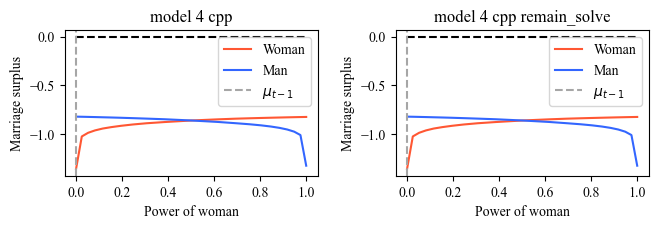

In [82]:
model_plot([model1,model2],plot_surplus,t,iP,iL,iA, subtitles=[model1.name,model2.name])

### Values

Plot female values

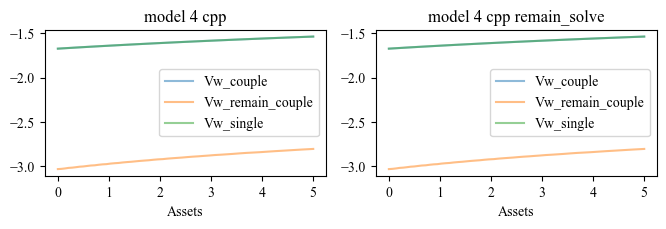

In [83]:
model_plot([model1,model2], plot_var_over_assets, ['Vw_couple','Vw_remain_couple','Vw_single'], idx, grid_points=False, subtitles=[model1.name, model2.name ])

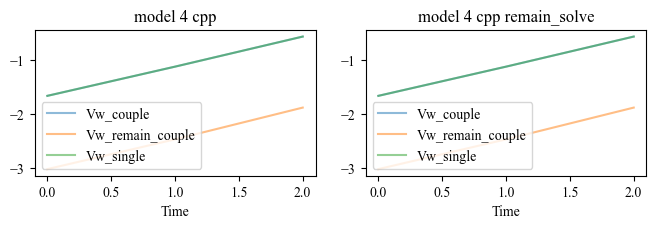

In [84]:
model_plot([model1,model2], plot_var_over_time, ['Vw_couple','Vw_remain_couple','Vw_single'], idx, subtitles=[model1.name, model2.name ])

Plot male values

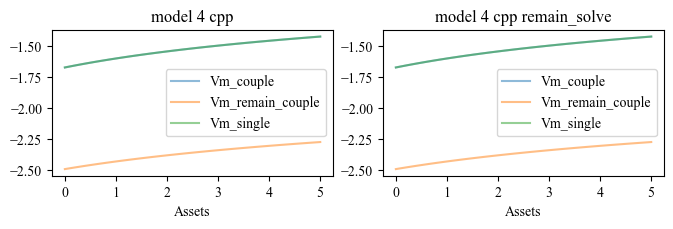

In [85]:
model_plot([model1,model2], plot_var_over_assets, ['Vm_couple','Vm_remain_couple','Vm_single'], idx, grid_points=False, subtitles=[model1.name, model2.name ])

### Consumption

Plot female consumption

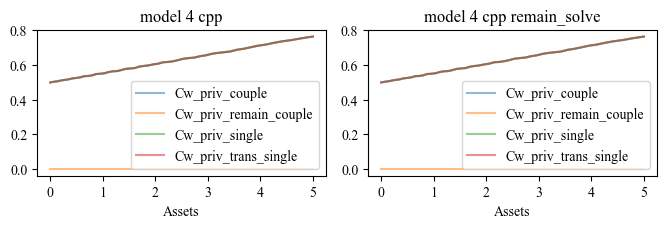

In [86]:
model_plot([model1,model2], plot_var_over_assets, ['Cw_priv_couple','Cw_priv_remain_couple','Cw_priv_single', 'Cw_priv_trans_single'], idx, grid_points=False, subtitles=[model1.name, model2.name ])

Plot male consumption

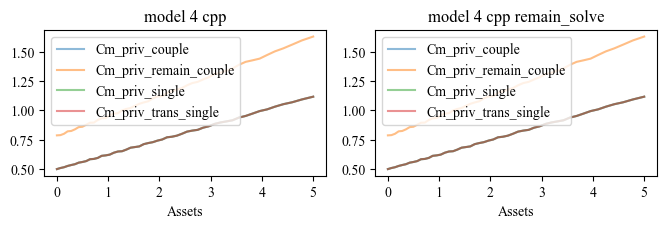

In [87]:
model_plot([model1,model2], plot_var_over_assets, ['Cm_priv_couple','Cm_priv_remain_couple','Cm_priv_single', 'Cm_priv_trans_single'], idx, grid_points=False, subtitles=[model1.name, model2.name ])

Plot public consumption

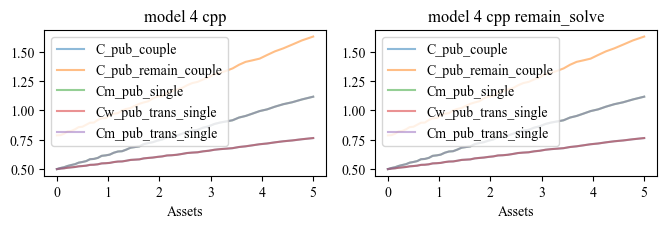

In [88]:
model_plot([model1,model2], plot_var_over_assets, ['C_pub_couple','C_pub_remain_couple','Cm_pub_single', 'Cw_pub_trans_single', 'Cm_pub_trans_single'], idx, grid_points=False, subtitles=[model1.name, model2.name ])

## Plots of difference

In [89]:
model_diff =  brg.HouseholdModelClass(name='Model differences')
model_diff.par = model1.par
model_diff.sol = difference_in_namespace(model1.sol, model2.sol)

Plot value

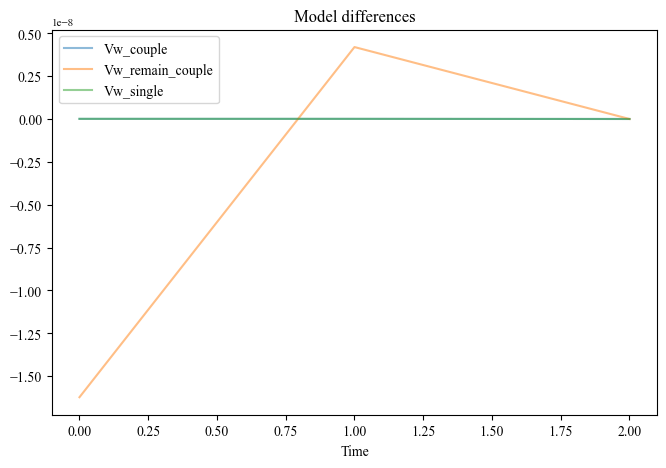

In [90]:
model_plot([model_diff], plot_var_over_time, ['Vw_couple','Vw_remain_couple','Vw_single'], idx, subtitles=[model_diff.name])

Plot consumption

Text(0.5, 0.5, 'Ctot')

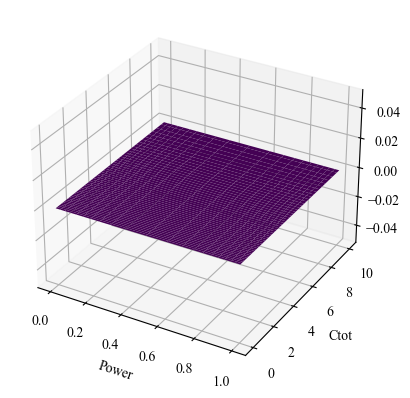

In [91]:
# plot pre_Ctot_Cw_priv in a 3 dimensional plot with using meshgrids 
fig = plt.figure()
ax = plt.axes(projection='3d')
mesh1, mesh2 = np.meshgrid(model1.par.grid_power, model1.par.grid_Ctot, indexing='ij')

ax.plot_surface(mesh1,mesh2, model_diff.sol.pre_Ctot_Cw_priv, cmap='viridis', edgecolor='none')

# label axes
ax.set_xlabel('Power')
ax.set_ylabel('Ctot')
